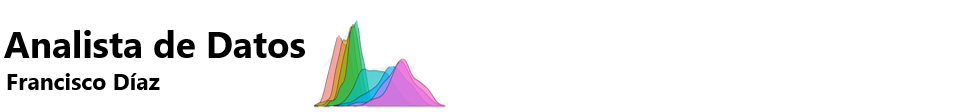

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [1]:
import kagglehub
import os

In [2]:
ruta = kagglehub.dataset_download("gauravduttakiit/coffee-leaf-diseases")
train_folder = os.path.join(ruta, 'train')
test_folder = os.path.join(ruta, 'test')

100%|██████████| 181M/181M [00:01<00:00, 134MB/s]

Extracting files...


NameError: name 'os' is not defined

In [ ]:
train_idg = ImageDataGenerator(rescale=1./255)
train_data = train_idg.flow_from_directory(
    train_folder,
        target_size=(224, 224),
            batch_size=32,
                class_mode='categorical'
                )
print(train_data)

Found 1264 images belonging to 4 classes.


In [ ]:
test_idg = ImageDataGenerator(rescale=1./255)
test_data = test_idg.flow_from_directory(
    test_folder,
        target_size=(224, 224),
            batch_size=32,
                class_mode='categorical',
                  shuffle=False
                )
print(test_data)

Found 400 images belonging to 4 classes.


In [ ]:
test_data.class_indices

{'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}

In [ ]:
train_data.class_indices

{'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


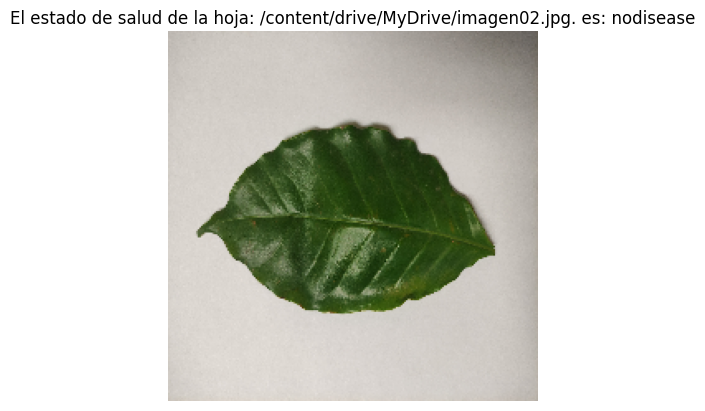

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


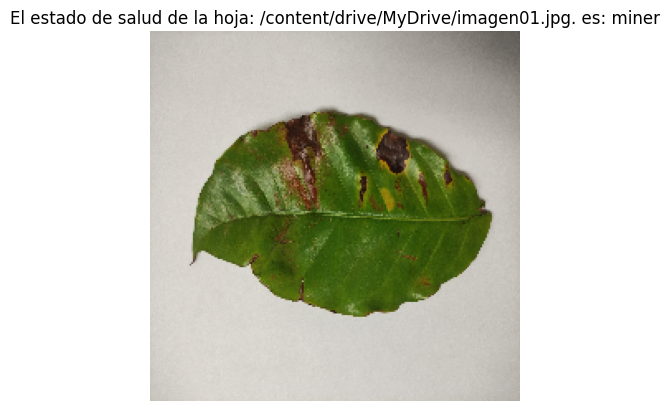

Error: No se encontró la imagen en la ruta: /content/drive/MyDrive/imagen03.jpg


In [ ]:
modelo = tf.keras.models.load_model("/content/drive/MyDrive/modelo_hojas_cafe.h5")

imagen_1 = "/content/drive/MyDrive/imagen02.jpg"
imagen_2 = "/content/drive/MyDrive/imagen01.jpg"
imagen_3 = "/content/drive/MyDrive/imagen03.jpg"  # New image path

# Verifica que el modelo esté cargado
try:
    modelo
except NameError:
    modelo = load_model("modelo_hojas_cafe.h5")

def predict_image_class(image_paths, model, class_indices):

    predicted_class_names = []

    for image_path in image_paths:
        if os.path.exists(image_path):
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction)
            predicted_class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]

            predicted_class_names.append(predicted_class_name)


            plt.imshow(img)
            plt.title(f"El estado de salud de la hoja: {image_path}. es: {predicted_class_name}")
            plt.axis('off')
            plt.show()

        else:
            print(f"Error: No se encontró la imagen en la ruta: {image_path}")
            predicted_class_names.append(None)

    return predicted_class_names



# Ejemplo de uso:
image_paths = [imagen_1, imagen_2, imagen_3]  # List of image paths
predicted_class_names = predict_image_class(image_paths, modelo, {'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3})


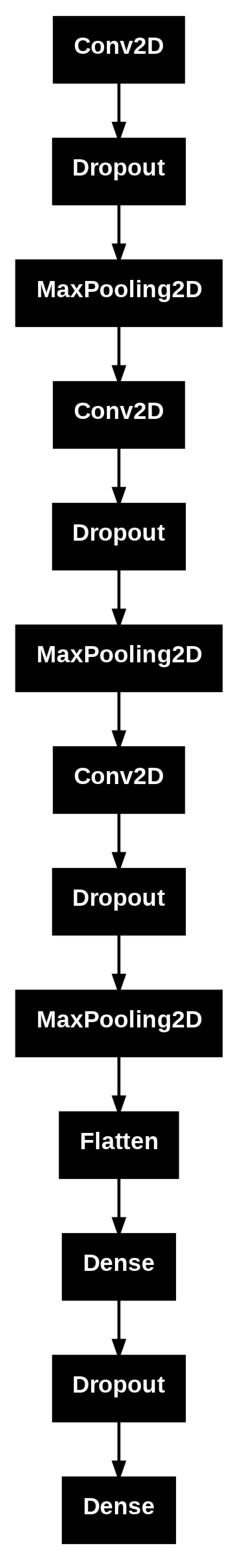

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plot_model(modelo)

data = plt.imread('model.png')


plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(data)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step


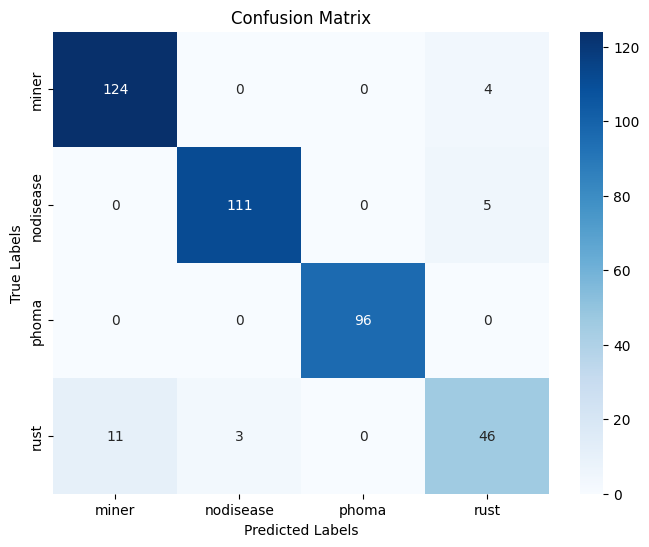

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = modelo.predict(test_data, batch_size=32)
true_labels = test_data.classes
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()